In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Evaluation

Performing slide-based evaluation of the trained model. Results are presented as ROC-Curves and ROC-AUC values for two different ways of aggregating the patch-wise prediction into slide-wise predictions.

In [39]:
from data.data_set import Dataset 
from model.inceptionv3_model import InceptionModel
from evaluation.evaluation import Predictions

test_dataset = Dataset('/home/dschacherer_fme/input/csv_test_norm_cancer.csv', num_classes=2)
model = InceptionModel(load_trained_model_from='/home/dschacherer_fme/output_test/trained_model')
predictions = Predictions(model, test_dataset) 
predictions.save('/home/dschacherer_fme/output_test/predictions.json')

KeyboardInterrupt: 

In [38]:
print(predictions.predictions)

                                            slide_id tile_position  \
0  TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a17...      [13, 13]   
1  TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a17...       [7, 16]   
2  TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a17...       [2, 10]   
3  TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a17...      [18, 15]   
4  TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a17...       [6, 22]   

   reference_value   prediction  
0                1  [0.8802585]  
1                1  [0.8802585]  
2                1  [0.8802585]  
3                1  [0.8802585]  
4                1  [0.8802585]  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


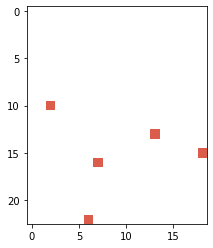

In [36]:
colormaps=['coolwarm', 'coolwarm', 'Oranges']
hm = predictions.generate_heatmap_for_slide('TCGA-18-3415-01A-01-TS1.d922ab4a-e5c2-4b49-a173-964e569e3985', colormaps)
plt.imshow(hm)

{'average_probability': array([nan, nan]), 'percentage_positive': array([nan, nan])} {'average_probability': array([0., 1.]), 'percentage_positive': array([0., 1.])} {'average_probability': nan, 'percentage_positive': nan}


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:805: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)


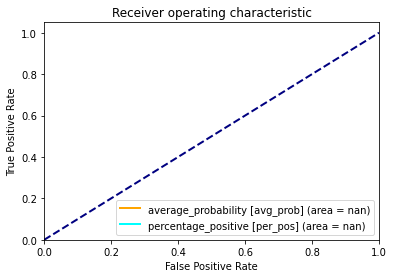

In [37]:
predictions.perform_roc_analysis()